<a href="https://colab.research.google.com/github/Praxis-QR/FDS/blob/main/FinTech_1_Technical_Analysis_NSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![CC-BY-SA](https://licensebuttons.net/l/by-sa/3.0/88x31.png)<br>
<hr>

![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/YantraJaalBanner.png)<br>


<hr>

[Prithwis Mukerjee](http://www.linkedin.com/in/prithwis)<br>

In [1]:
from datetime import datetime
import pytz
print('Tested on ',datetime.now(pytz.timezone('Asia/Calcutta')))
!python --version
!lsb_release -a

Tested on  2023-12-20 05:47:52.761443+05:30
Python 3.10.12
No LSB modules are available.
Distributor ID:	Ubuntu
Description:	Ubuntu 22.04.3 LTS
Release:	22.04
Codename:	jammy


#Getting Historical Stock Market Data / NSE <br>
What is a stock? Why is it important? [Read here](https://docs.google.com/presentation/d/1eRLBw2ATwJSa8qFu0YUUNIayAL2Mogm-Q6LljTHM4S4/edit?usp=sharing) <br>
NSE Data is available here #NSE Data is available at https://www.nseindia.com/ <br>
![alt text](https://raw.githubusercontent.com/Praxis-QR/FDS/main/images/nse201223.png)<br>For symbols like BHARTIARTL, LT, HULV, HDFC etc <br>


Index data is available here https://www1.nseindia.com/products/content/equities/indices/historical_index_data.htm <br>
BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0




##Load NSE Data in CSV format

In [2]:
#NSE Data is available at https://www.nseindia.com/products/content/equities/equities/eq_security.htm
#Sample Data on four companies are available here
!wget -O hdfc.csv 'https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/NSE_hdfc.csv' # HDFC Bank
!wget -O hulv.csv 'https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/NSE_hulv.csv' # Hindustan Unilever
!wget -O tata.csv 'https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/NSE_tata.csv' # Tata Steel
!wget -O lnto.csv 'https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/NSE_lnto.csv' # Larsen & Toubr

--2023-12-20 00:17:58--  https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/NSE_hdfc.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 40631 (40K) [text/plain]
Saving to: ‘hdfc.csv’

hdfc.csv            100%[===================>]  39.68K  --.-KB/s    in 0s      

2023-12-20 00:17:58 (81.9 MB/s) - ‘hdfc.csv’ saved [40631/40631]

--2023-12-20 00:17:59--  https://raw.githubusercontent.com/Praxis-QR/FDS/main/data/fintech/NSE_hulv.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39658 (39K) [text/plain]
Saving to: ‘

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#!cat hdfc.csv

In [17]:
dfchk = pd.read_csv('tata.csv', delimiter = ',')
#dfchk = pd.read_csv(nseData, delimiter = ',')
dfchk.head(3)

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,18-Dec-2023,EQ,136.85,137.60,135.1,136.45,136.55,136.60,136.73,137.60,101.55,"3,84,61,877","5,25,88,16,795.55","2,59,565"
1,15-Dec-2023,EQ,133.40,136.75,133.0,132.00,136.55,136.45,135.24,136.75,101.55,"7,73,77,446","10,46,44,13,045.45","2,92,704"
2,14-Dec-2023,EQ,132.30,133.25,131.5,131.40,132.00,132.00,132.33,135.00,101.55,"4,33,72,143","5,73,93,57,415.20","1,85,803"


In [18]:
dfchk.columns

Index(['Date ', 'series ', 'OPEN ', 'HIGH ', 'LOW ', 'PREV. CLOSE ', 'ltp ',
       'close ', 'vwap ', '52W H ', '52W L ', 'VOLUME ', 'VALUE ',
       'No of trades '],
      dtype='object')

In [19]:
dfchk.dtypes

Date              object
series            object
OPEN             float64
HIGH             float64
LOW              float64
PREV. CLOSE      float64
ltp              float64
close            float64
vwap             float64
52W H             object
52W L            float64
VOLUME            object
VALUE             object
No of trades      object
dtype: object

In [20]:
dropCols = ['series ',  'PREV. CLOSE ', 'ltp ', 'vwap ', '52W H ', '52W L ',  'VALUE ',    'No of trades ']
#drop_cols = ['Symbol', 'Series', 'Date', 'Prev Close',  'Last Price',   'Total Traded Quantity']
dfchk.drop(dropCols,axis=1,inplace=True)

In [21]:
dfchk.head(3)

,Date,OPEN,HIGH,LOW,close,VOLUME
0,18-Dec-2023,136.85,137.60,135.1,136.60,"3,84,61,877"
1,15-Dec-2023,133.40,136.75,133.0,136.45,"7,73,77,446"
2,14-Dec-2023,132.30,133.25,131.5,132.00,"4,33,72,143"


In [22]:
dfchk.rename(columns={'Date ':'Date','OPEN ':'OPEN','HIGH ':'HIGH','LOW ':'LOW','close ':'CLOSE','VOLUME ':'VOLUME'}, inplace=True)
dfchk.head(3)

,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,18-Dec-2023,136.85,137.60,135.1,136.60,"3,84,61,877"
1,15-Dec-2023,133.40,136.75,133.0,136.45,"7,73,77,446"
2,14-Dec-2023,132.30,133.25,131.5,132.00,"4,33,72,143"


In [23]:
x = dfchk.OPEN.dtypes
print(x)

float64


In [24]:
if (dfchk.OPEN.dtypes == 'object'):
    print('string')
if (dfchk.OPEN.dtypes == 'float64'):
    print('numeric')

numeric


In [25]:
dfchk['Date'] = pd.to_datetime(dfchk['Date'],format='%d-%b-%Y')
if (dfchk.OPEN.dtypes == 'object'):
    dfchk['OPEN'] = pd.to_numeric(dfchk['OPEN'].str.replace(',', ''))
if (dfchk.HIGH.dtypes == 'object'):
    dfchk['HIGH'] = pd.to_numeric(dfchk['HIGH'].str.replace(',', ''))
if (dfchk.LOW.dtypes == 'object'):
    dfchk['LOW'] = pd.to_numeric(dfchk['LOW'].str.replace(',', ''))
if (dfchk.CLOSE.dtypes == 'object'):
    dfchk['CLOSE'] = pd.to_numeric(dfchk['CLOSE'].str.replace(',', ''))
if (dfchk.VOLUME.dtypes == 'object'):
    dfchk['VOLUME'] = pd.to_numeric(dfchk['VOLUME'].str.replace(',', ''))
dfchk.head(3)

,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
0,2023-12-18,136.85,137.60,135.1,136.60,38461877
1,2023-12-15,133.40,136.75,133.0,136.45,77377446
2,2023-12-14,132.30,133.25,131.5,132.00,43372143


In [26]:
dfchk.dtypes

Date      datetime64[ns]
OPEN             float64
HIGH             float64
LOW              float64
CLOSE            float64
VOLUME             int64
dtype: object

In [27]:
dfchk = dfchk.sort_values('Date')
dfchk.head()

,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
247,2022-12-19,111.05,112.10,110.80,111.80,17297590
246,2022-12-20,111.15,111.50,109.00,110.95,34836506
245,2022-12-21,111.80,112.00,108.70,109.40,32303565
244,2022-12-22,110.00,110.60,106.35,107.65,39639329
243,2022-12-23,106.00,106.75,101.95,102.25,46756489


In [28]:
def formatNSEdata(csvfile):
    df = pd.read_csv(csvfile, delimiter = ',')
    dropCols = ['series ',  'PREV. CLOSE ', 'ltp ', 'vwap ', '52W H ', '52W L ',  'VALUE ',    'No of trades ']
    df.drop(dropCols,axis=1,inplace=True)
    df.rename(columns={'Date ':'Date','OPEN ':'OPEN','HIGH ':'HIGH','LOW ':'LOW','close ':'CLOSE','VOLUME ':'VOLUME'}, inplace=True)
    df['Date'] = pd.to_datetime(df['Date'],format='%d-%b-%Y')
    if (df.OPEN.dtypes == 'object'):
        df['OPEN'] = pd.to_numeric(df['OPEN'].str.replace(',', ''))
    if (df.HIGH.dtypes == 'object'):
        df['HIGH'] = pd.to_numeric(df['HIGH'].str.replace(',', ''))
    if (df.LOW.dtypes == 'object'):
        df['LOW'] = pd.to_numeric(df['LOW'].str.replace(',', ''))
    if (df.CLOSE.dtypes == 'object'):
        df['CLOSE'] = pd.to_numeric(df['CLOSE'].str.replace(',', ''))
    if (df.VOLUME.dtypes == 'object'):
        df['VOLUME'] = pd.to_numeric(df['VOLUME'].str.replace(',', ''))
    df = df.sort_values('Date')
    return df


In [29]:
dfhdfc = formatNSEdata('hdfc.csv')
dfhdfc.head()

,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
247,2022-12-19,1644.0,1646.65,1626.20,1644.75,4802271
246,2022-12-20,1620.2,1636.40,1620.20,1633.40,3587349
245,2022-12-21,1641.0,1644.80,1606.55,1617.60,4634599
244,2022-12-22,1622.2,1627.50,1609.00,1612.05,4873548
243,2022-12-23,1587.0,1604.15,1585.45,1597.65,5346576


In [30]:
dfhulv = formatNSEdata('hulv.csv')
dfhulv.head()

,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
247,2022-12-19,2671.30,2720.00,2671.30,2718.10,1546941
246,2022-12-20,2706.00,2706.05,2653.25,2674.55,827567
245,2022-12-21,2687.95,2695.15,2650.10,2666.20,779092
244,2022-12-22,2676.50,2688.50,2642.00,2645.35,852567
243,2022-12-23,2632.00,2649.55,2608.05,2621.10,1189702


In [31]:
dflnto = formatNSEdata('lnto.csv')
dflnto.head()

,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
247,2022-12-19,2171.0,2187.45,2155.05,2184.00,1592779
246,2022-12-20,2179.9,2179.90,2138.00,2163.25,1747181
245,2022-12-21,2153.1,2174.95,2142.85,2146.30,1979681
244,2022-12-22,2144.0,2148.35,2096.90,2109.95,1993744
243,2022-12-23,2094.5,2104.15,2050.10,2062.75,2026125


In [32]:
dftata = formatNSEdata('tata.csv')
dftata.head()

,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
247,2022-12-19,111.05,112.10,110.80,111.80,17297590
246,2022-12-20,111.15,111.50,109.00,110.95,34836506
245,2022-12-21,111.80,112.00,108.70,109.40,32303565
244,2022-12-22,110.00,110.60,106.35,107.65,39639329
243,2022-12-23,106.00,106.75,101.95,102.25,46756489


#Basic Charts

##One Company Data

In [33]:
#dfHDFC = pd.read_csv('hdfc.csv', delimiter = ',')
dfHDFC = formatNSEdata('hdfc.csv')
#dfHDFC.count()
dfHDFC.head()

,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
247,2022-12-19,1644.0,1646.65,1626.20,1644.75,4802271
246,2022-12-20,1620.2,1636.40,1620.20,1633.40,3587349
245,2022-12-21,1641.0,1644.80,1606.55,1617.60,4634599
244,2022-12-22,1622.2,1627.50,1609.00,1612.05,4873548
243,2022-12-23,1587.0,1604.15,1585.45,1597.65,5346576


In [34]:
#Number of trading days / data points
dfHDFC.count()

Date      248
OPEN      248
HIGH      248
LOW       248
CLOSE     248
VOLUME    248
dtype: int64

<Axes: xlabel='Date'>

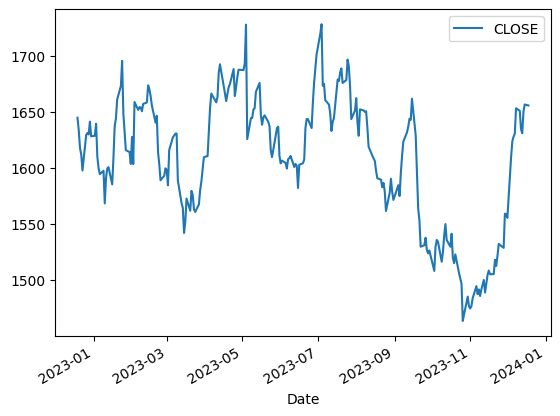

In [35]:
dfHDFC.plot(kind='line',x='Date',y='CLOSE')

In [36]:
startDate = dfHDFC['Date'][dfHDFC.index[0]]
endDate = dfHDFC['Date'][dfHDFC.index[-1]]
print(startDate,endDate)

2022-12-19 00:00:00 2023-12-18 00:00:00


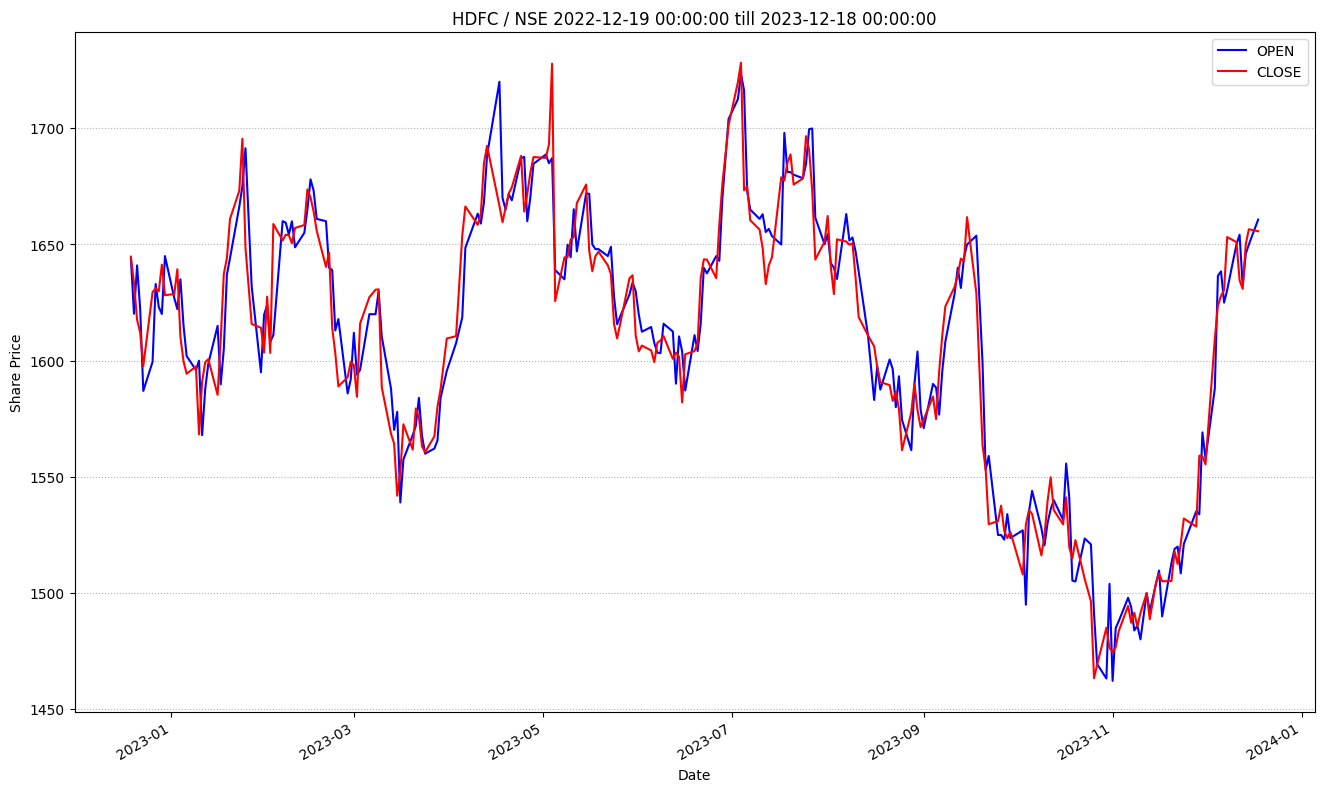

In [37]:
# Plotting directly from DataFrames with Pandas
dfHDFC.plot(
    x='Date',
    y=['OPEN', 'CLOSE'],
    kind='line',
    legend=False,
    color=['blue','red'],
    figsize=(16,10)

)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("HDFC / NSE "+str(startDate)+" till "+str(endDate))
plt.legend()
plt.gca().yaxis.grid(linestyle=':')

Why did the HDFC Bank share price so much on 18th September ? [See](https://tradingqna.com/t/hdfc-bank-goes-ex-split-in-the-ratio-2-1-on-september-19-2019-here-s-how-it-impacts-your-equity-holdings-and-f-o-positions/63025)

##Compare Two Companies

In [38]:
dfHDFC = formatNSEdata('hdfc.csv')
dfHUL = formatNSEdata('hulv.csv')

In [39]:
dfHDFC = formatNSEdata('hdfc.csv')
dfHDFC.head(2)

,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
247,2022-12-19,1644.0,1646.65,1626.2,1644.75,4802271
246,2022-12-20,1620.2,1636.40,1620.2,1633.40,3587349


In [40]:
dfHUL = formatNSEdata('hulv.csv')
dfHUL.head(2)

,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
247,2022-12-19,2671.3,2720.00,2671.30,2718.10,1546941
246,2022-12-20,2706.0,2706.05,2653.25,2674.55,827567


In [41]:
df2Com = pd.merge(dfHDFC[['Date','CLOSE']],dfHUL[['Date','CLOSE']],on='Date')
df2Com.head(2)

,Date,CLOSE_x,CLOSE_y
0,2022-12-19,1644.75,2718.10
1,2022-12-20,1633.40,2674.55


In [42]:
df2Com = df2Com.rename(columns ={'CLOSE_x':'HDFC','CLOSE_y':'HUL'})
df2Com.head(2)

,Date,HDFC,HUL
0,2022-12-19,1644.75,2718.10
1,2022-12-20,1633.40,2674.55


In [43]:
startDate = df2Com['Date'][dfHDFC.index[0]]
endDate = df2Com['Date'][dfHDFC.index[-1]]
print(startDate,endDate)

2023-12-18 00:00:00 2022-12-19 00:00:00


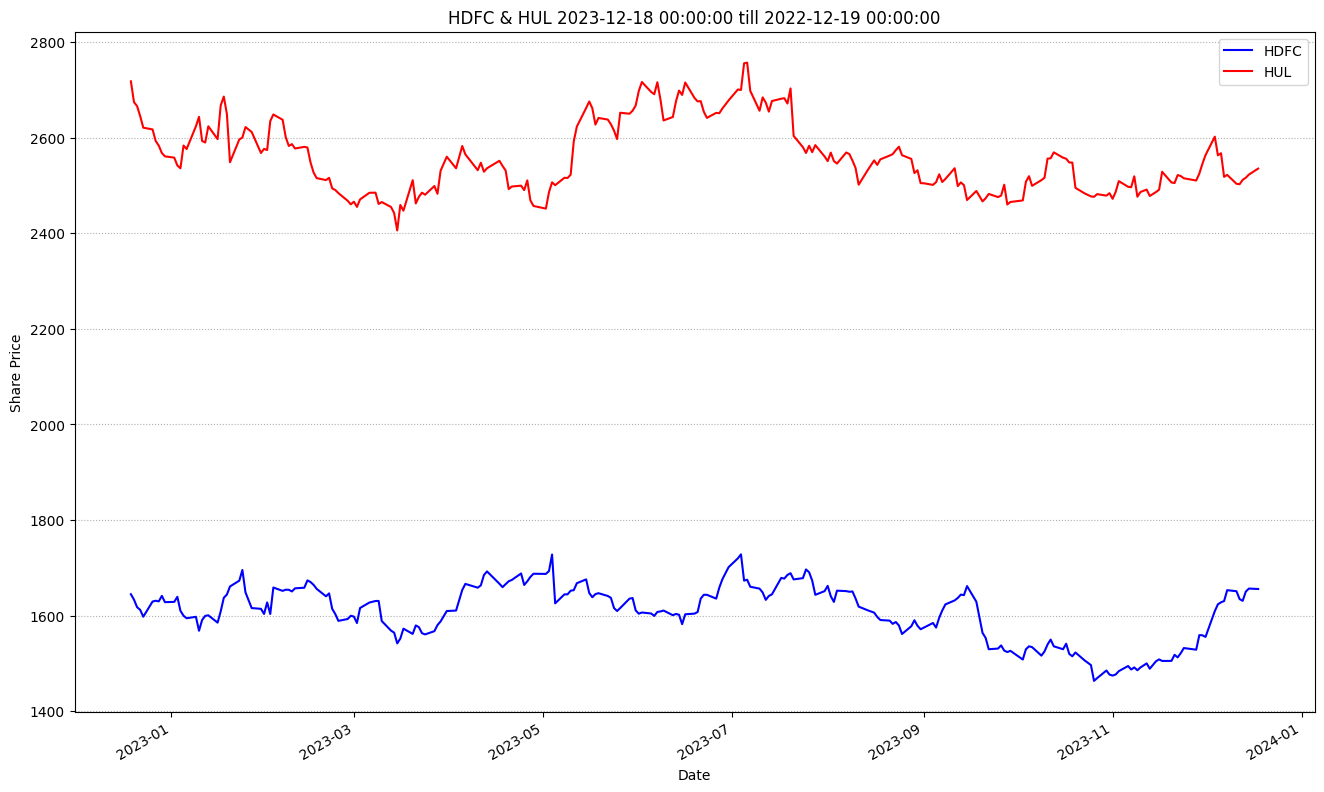

In [44]:
# Plotting directly from DataFrames with Pandas
df2Com.plot(
    x='Date',
    y=['HDFC', 'HUL'],
    kind='line',
    legend=False,
    color=['blue','red'],
    figsize=(16,10)

)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("HDFC & HUL "+str(startDate)+" till "+str(endDate))
plt.legend()
plt.gca().yaxis.grid(linestyle=':')

##Compare Three Companies

In [45]:
dfLNTO = formatNSEdata('lnto.csv')
dfLNTO.head(2)

,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
247,2022-12-19,2171.0,2187.45,2155.05,2184.00,1592779
246,2022-12-20,2179.9,2179.90,2138.00,2163.25,1747181


In [46]:
df3Com = pd.merge(df2Com[['Date','HDFC','HUL']],dfLNTO[['Date','CLOSE']],on='Date')
df3Com.head(2)

,Date,HDFC,HUL,CLOSE
0,2022-12-19,1644.75,2718.10,2184.00
1,2022-12-20,1633.40,2674.55,2163.25


In [47]:
df3Com = df3Com.rename(columns ={'CLOSE':'L&T'})
df3Com.head(2)

,Date,HDFC,HUL,L&T
0,2022-12-19,1644.75,2718.10,2184.00
1,2022-12-20,1633.40,2674.55,2163.25


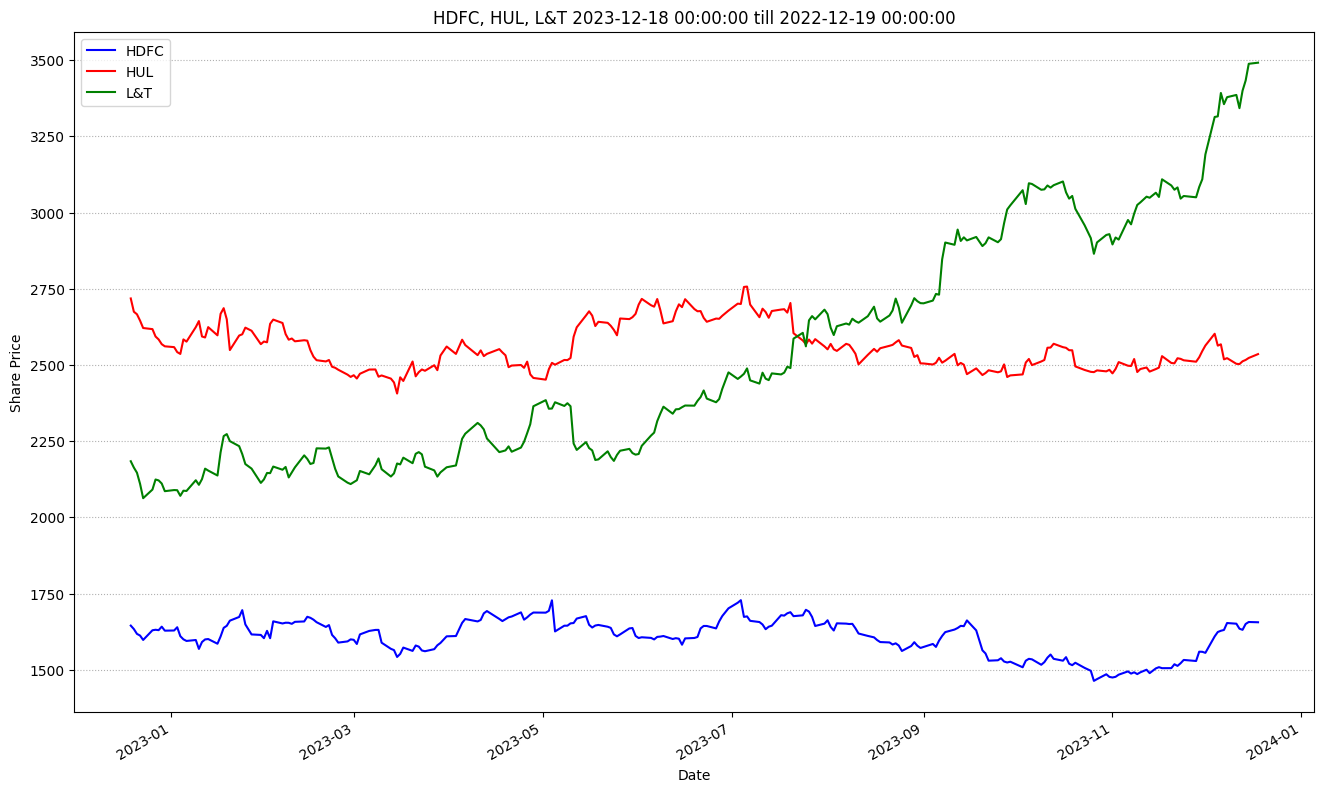

In [48]:
# Plotting directly from DataFrames with Pandas
df3Com.plot(
    x='Date',
    y=['HDFC', 'HUL', 'L&T'],
    kind='line',
    legend=False,
    color=['blue','red', 'green'],
    figsize=(16,10)
)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("HDFC, HUL, L&T "+str(startDate)+" till "+str(endDate))
plt.legend()
plt.gca().yaxis.grid(linestyle=':')

#Scaling the Data

In [49]:
df = df3Com.copy()
df.head()

,Date,HDFC,HUL,L&T
0,2022-12-19,1644.75,2718.10,2184.00
1,2022-12-20,1633.40,2674.55,2163.25
2,2022-12-21,1617.60,2666.20,2146.30
3,2022-12-22,1612.05,2645.35,2109.95
4,2022-12-23,1597.65,2621.10,2062.75


In [50]:
df['HDFC'] = df['HDFC']/df['HDFC'][0]
df['HUL'] = df['HUL']/df['HUL'][0]
df['L&T'] = df['L&T']/df['L&T'][0]
df.head(10)

,Date,HDFC,HUL,L&T
0,2022-12-19,1.000000,1.000000,1.000000
1,2022-12-20,0.993099,0.983978,0.990499
2,2022-12-21,0.983493,0.980906,0.982738
3,2022-12-22,0.980119,0.973235,0.966094
4,2022-12-23,0.971363,0.964313,0.944483
5,2022-12-26,0.990698,0.962970,0.957440
6,2022-12-27,0.991701,0.954067,0.972573
7,2022-12-28,0.990910,0.950517,0.971200
8,2022-12-29,0.997902,0.944796,0.966529
9,2022-12-30,0.989907,0.942221,0.955037


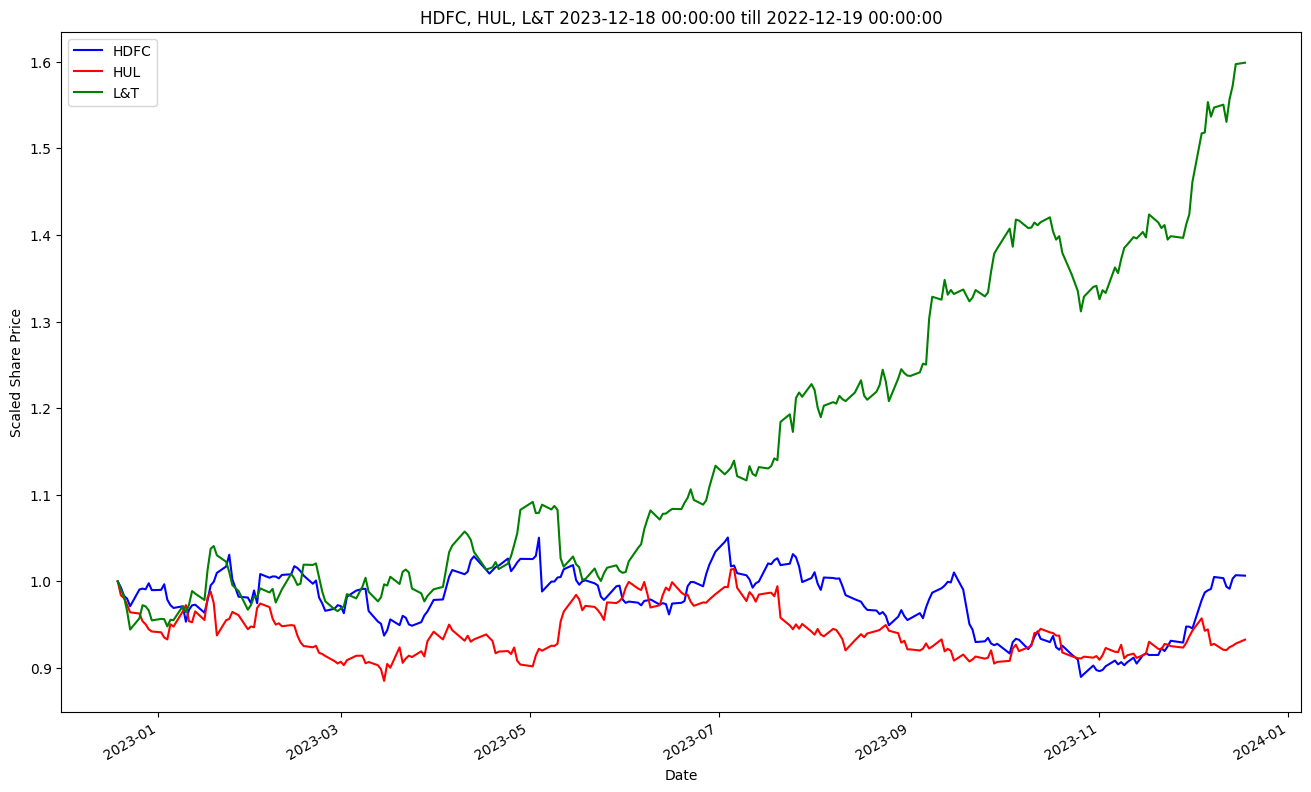

In [51]:
# Plotting directly from DataFrames with Pandas
df.plot(
    x='Date',
    y=['HDFC', 'HUL', 'L&T'],
    kind='line',
    legend=False,
    color=['blue','red', 'green'],
    figsize=(16,10)
)

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Scaled Share Price')
plt.xlabel("Date")
plt.title("HDFC, HUL, L&T "+str(startDate)+" till "+str(endDate))
plt.legend()

#Simple Moving Average

In [52]:
df = formatNSEdata('hulv.csv')
df.head(2)

,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
247,2022-12-19,2671.3,2720.00,2671.30,2718.10,1546941
246,2022-12-20,2706.0,2706.05,2653.25,2674.55,827567


In [53]:
df.set_index('Date',inplace=True)
df.head(3)

,OPEN,HIGH,LOW,CLOSE,VOLUME
Date,,,,,
2022-12-19,2671.30,2720.00,2671.30,2718.10,1546941
2022-12-20,2706.00,2706.05,2653.25,2674.55,827567
2022-12-21,2687.95,2695.15,2650.10,2666.20,779092


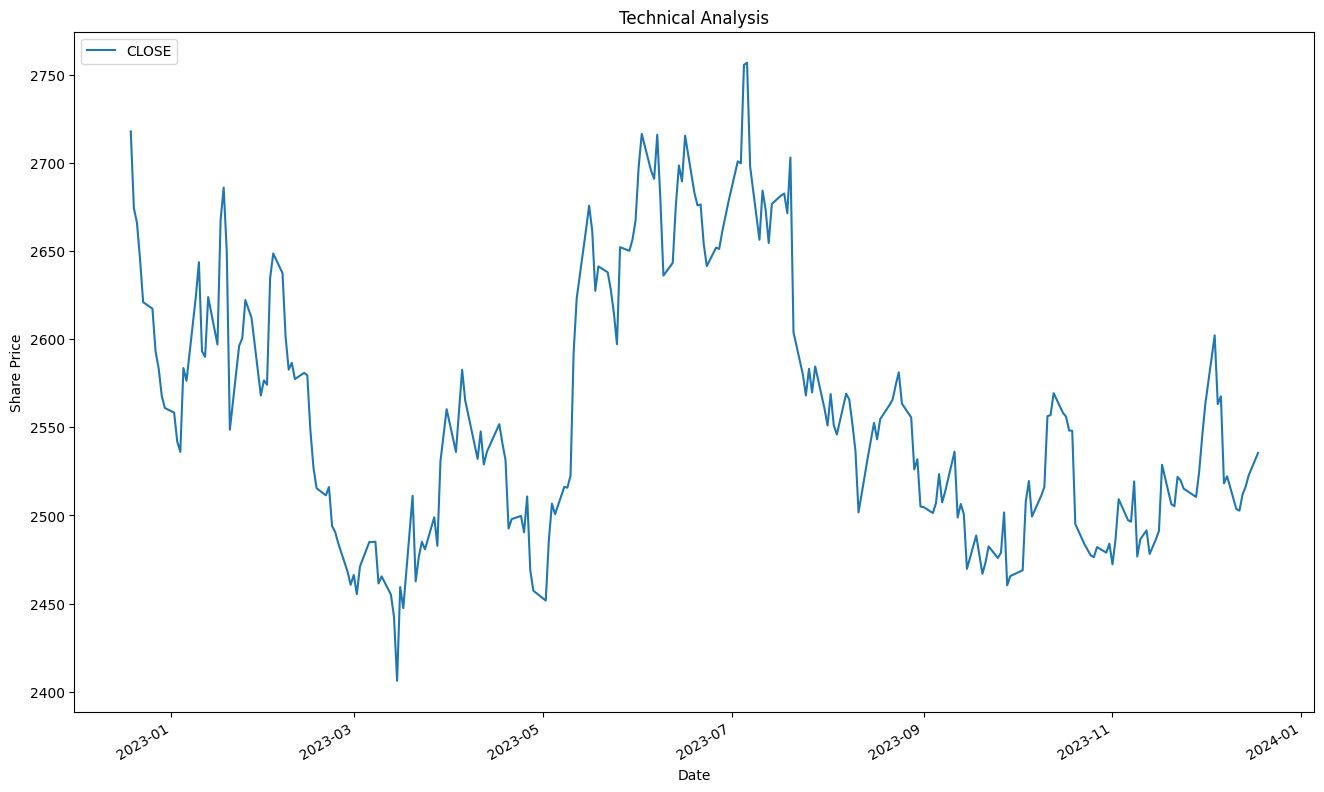

In [54]:
df.plot(y='CLOSE', figsize=(16,10))

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("Technical Analysis")
plt.legend(loc='upper left')

In [55]:
df['SMA10'] = df['CLOSE'].rolling(10).mean()
df['SMA30'] = df['CLOSE'].rolling(30).mean()
#df.tail()
#df.head(40)
df.count()

OPEN      248
HIGH      248
LOW       248
CLOSE     248
VOLUME    248
SMA10     239
SMA30     219
dtype: int64

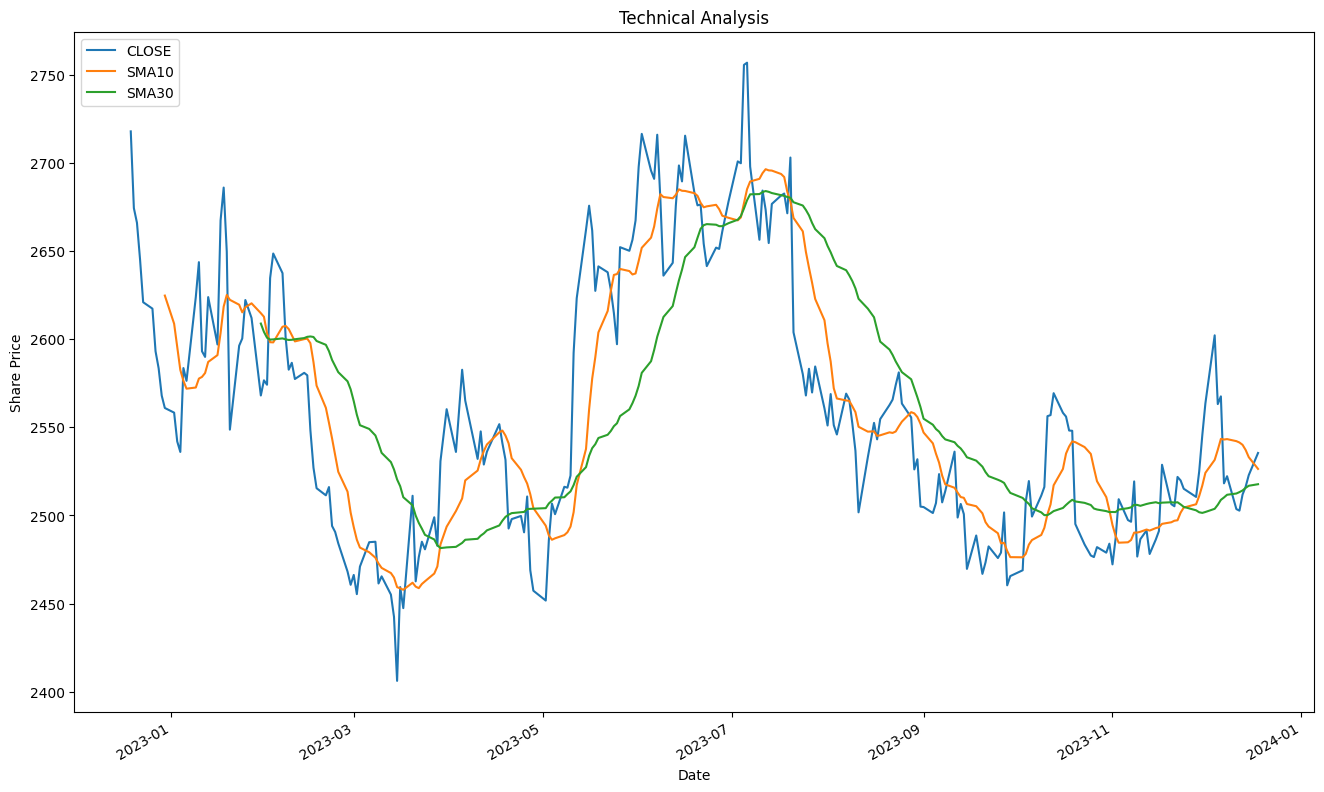

In [56]:
df.plot(y=['CLOSE','SMA10','SMA30'],
        figsize=(16,10))

# The plot is now created, and we use Matplotlib style
# commands to enhance the output.
plt.ylabel('Share Price')
plt.xlabel("Date")
plt.title("Technical Analysis")
plt.legend(loc='upper left')

#Technical Charts

In [57]:
!pip install mplfinance > /dev/null
import mplfinance as mpf

In [59]:
#df = pd.read_csv('hdfc.csv', delimiter = ',')
#df.head()

In [60]:
#list(df.columns)
#drop_cols = ['Symbol', 'Series', 'Date', 'Prev Close',  'Last Price',   'Total Traded Quantity']
#df.drop(dropCols,axis=1,inplace=True)
#df.head(3)

In [61]:
#df.rename(columns={'Open Price':'Open','High Price':'High','Low Price':'Low','Close Price':'Close','Total Traded Quantity':'Volume'}, inplace=True)
#df.head(3)

In [62]:
#df['Date'] = pd.to_datetime(df['Date'])
#df.head(3)

In [64]:
df = formatNSEdata('hulv.csv')
df.head(2)

,Date,OPEN,HIGH,LOW,CLOSE,VOLUME
247,2022-12-19,2671.3,2720.00,2671.30,2718.10,1546941
246,2022-12-20,2706.0,2706.05,2653.25,2674.55,827567


In [65]:
df.set_index('Date',inplace=True)
df.head(3)

,OPEN,HIGH,LOW,CLOSE,VOLUME
Date,,,,,
2022-12-19,2671.30,2720.00,2671.30,2718.10,1546941
2022-12-20,2706.00,2706.05,2653.25,2674.55,827567
2022-12-21,2687.95,2695.15,2650.10,2666.20,779092


In [66]:
df.rename(columns={'Date ':'Date','OPEN':'Open','HIGH':'High','LOW':'Low','CLOSE':'Close','VOLUME':'Volume'}, inplace=True)

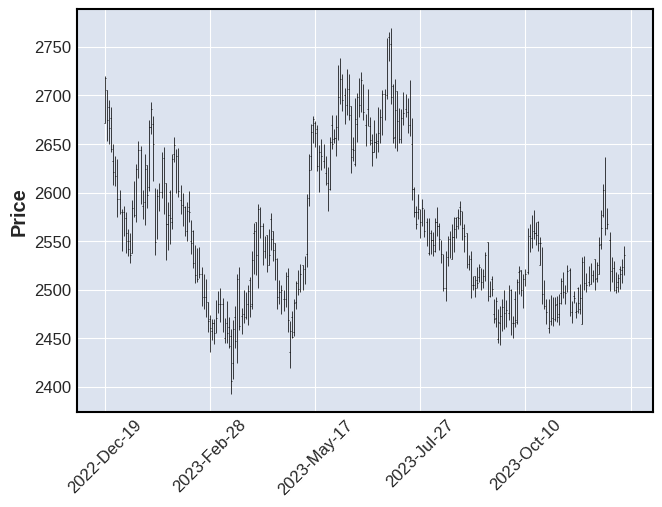

In [67]:
#very basic usage
mpf.plot(df)

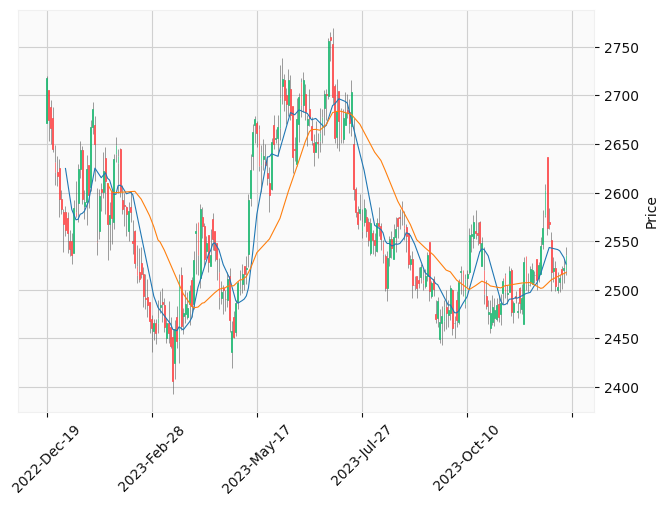

In [68]:
#add moving average and candles
mpf.plot(df, type='candle',mav=(10,30), style='yahoo')

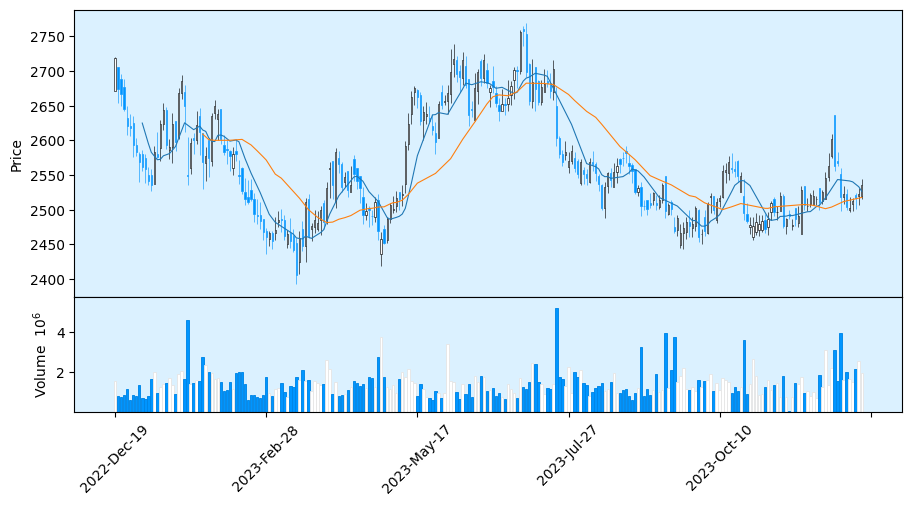

In [69]:
#add volume
mpf.plot(df, type='candle',mav=(10,30), style='blueskies', volume=True,figratio=(20,10))

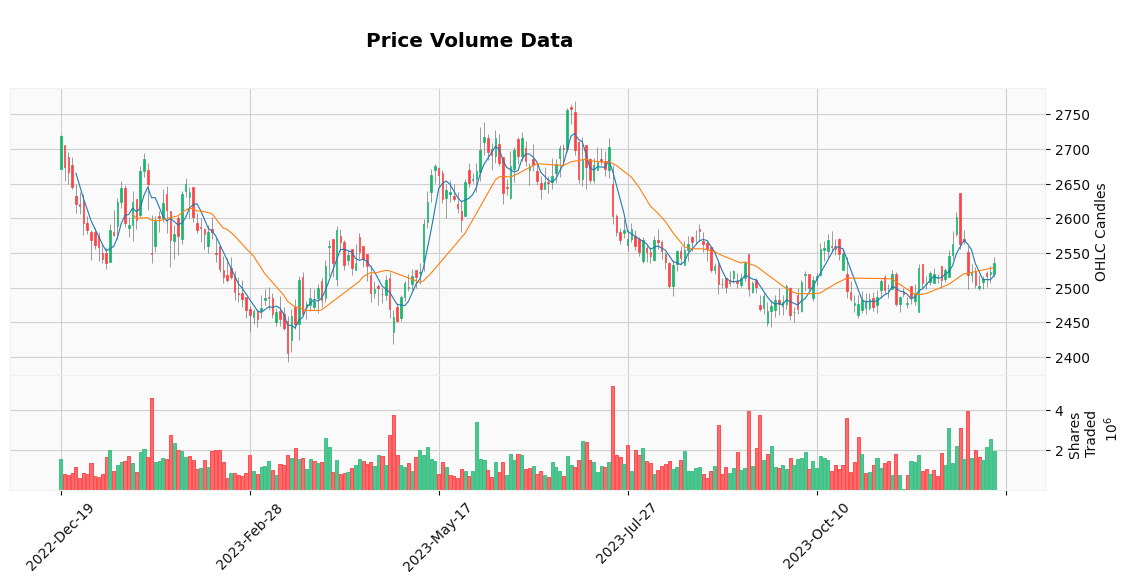

In [70]:
mpf.plot(df, type='candle',
         style='yahoo',
         mav=(5,20),
         volume=True,
         figratio=(30,12),
         title='\nPrice Volume Data',
         ylabel='OHLC Candles',
         ylabel_lower='Shares \nTraded')

#Exercise
Visit the NSE site https://www1.nseindia.com/products/content/equities/equities/eq_security.htm <br>
or BSE Site BSE Historical Data is available at https://www.bseindia.com/markets/equity/EQReports/StockPrcHistori.html?flag=0 <br>

![alt text](https://github.com/Praxis-QR/FDS/raw/main/images/BSEHistoricData.png)<br>
get the data for three other companies and perform the same analysis

#Chronobooks <br>
Two science fiction novels by Prithwis Mukerjee. A dystopian Earth. A technocratic society managed by artificial intelligence. Escape and epiphany on Mars. Can man and machine, carbon and silicon explore and escape into other dimensions of existence? An Indic perspective rooted in Advaita Vedanta and the Divine Feminine.  [More information](http://bit.ly/chronobooks) <br>
![alt text](https://github.com/Praxis-QR/RDWH/raw/main/images/CTCYFooter-1.png)